In [1]:
%matplotlib inline

from time import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
import graphviz

/home/jovyan/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print()
print('MNIST data loaded: train:',len(X_train),'test:',len(X_test))
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

Using TensorFlow backend.



MNIST data loaded: train: 60000 test: 10000
X_train: (60000, 28, 28)
y_train: (60000,)
X_test (10000, 28, 28)
y_test (10000,)


### Decision Trees

In [5]:
t0 = time()

clf_dt = DecisionTreeClassifier()
print(clf_dt.fit(X_train.reshape(-1,28*28), y_train))
print("Aikaa kulunut: %.2fs" % (time()-t0))

pred_dt = clf_dt.predict(X_test.reshape(-1,28*28))
print("Ennakoitiin", len(pred_dt), "numeroa tarkkuudella:", accuracy_score(y_test, pred_dt))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Aikaa kulunut: 22.93s
Ennakoitiin 10000 numeroa tarkkuudella: 0.8778


In [6]:
export_graphviz(clf_dt, out_file="mydt.dot")
with open("mydt.dot") as f:
    dot_graph = f.read()
    a = graphviz.Source(dot_graph)
    print("Kirjoitettiin PDF-tiedosto:", a.render("mydt", view=False))

Kirjoitettiin PDF-tiedosto: mydt.pdf


In [8]:
t0 = time()

clf_dt = DecisionTreeClassifier(max_depth=3)
print(clf_dt.fit(X_train.reshape(-1,28*28), y_train))
print("Aikaa kulunut: %.2fs" % (time()-t0))

pred_dt = clf_dt.predict(X_test.reshape(-1,28*28))
print("Ennakoitiin", len(pred_dt), "numeroa tarkkuudella:", accuracy_score(y_test, pred_dt))

export_graphviz(clf_dt, out_file="mydt.dot")
with open("mydt.dot") as f:
    dot_graph = f.read()
    a = graphviz.Source(dot_graph)
    print("Kirjoitettiin PDF-tiedosto:", a.render("mydt", view=False))


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
Aikaa kulunut: 4.42s
Ennakoitiin 10000 numeroa tarkkuudella: 0.4953
Kirjoitettiin PDF-tiedosto: mydt.pdf


### Random Forests

In [33]:
t0 = time()
clf_rf =RandomForestClassifier(n_estimators = 400)
print(clf_rf.fit(X_train.reshape(-1,28*28), y_train))
print("Aikaa kului: %.2fs" % (time()-t0))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
Aikaa kului: 178.89s


In [34]:
pred_rf = clf_rf.predict(X_test.reshape(-1,28*28))
print("Ennakoitiin", len(pred_rf), "numeroa tarkkuudella:", accuracy_score(y_test, pred_rf))

Ennakoitiin 10000 numeroa tarkkuudella: 0.9714


In [11]:
def show_failures(predictions, trueclass=None, predictedclass=None, maxtoshow=10):
    errors = predictions!=y_test
    print('Showing max', maxtoshow, 'first failures. '
          'The predicted class is shown first and the correct class in parenthesis.')
    ii = 0
    plt.figure(figsize=(maxtoshow, 1))
    for i in range(X_test.shape[0]):
        if ii>=maxtoshow:
            break
        if errors[i]:
            if trueclass is not None and y_test[i] != trueclass:
                continue
            if predictedclass is not None and predictions[i] != predictedclass:
                continue
            plt.subplot(1, maxtoshow, ii+1)
            plt.axis('off')
            plt.imshow(X_test[i,:,:], cmap="gray")
            plt.title("%d (%d)" % (predictions[i], y_test[i]))
            ii = ii + 1

Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.


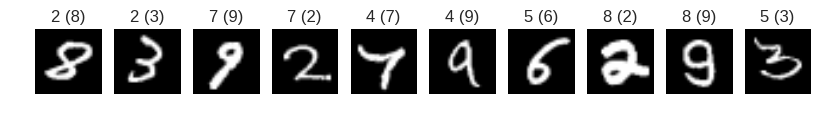

In [12]:
show_failures(pred_rf)

In [13]:
print("Confusion matrix (rows: true classes; columns: predicted classes):"); print()
cm = confusion_matrix(y_test, pred_rf, labels = list(range(10)))
print(cm); print()

print("Luokittelutarkkuus jokaiselle luokalle."); print()
for i, j in enumerate(cm.diagonal() / cm.sum(axis = 1)):
    print("%d: %.4f" % (i,j))

Confusion matrix (rows: true classes; columns: predicted classes):

[[ 973    0    0    0    0    1    1    1    3    1]
 [   1 1121    2    4    0    2    3    1    1    0]
 [  15    2  978    7    4    1    3   15    6    1]
 [   0    1   17  947    1   16    2    8   13    5]
 [   3    0    4    0  940    0    3    3    7   22]
 [   6    2    4   30    3  826    9    3    8    1]
 [  11    4    2    2    5   11  917    0    6    0]
 [   2    8   20    8    5    0    0  967    3   15]
 [   4    4   10   26   13   17    5    7  879    9]
 [   6    8    6   11   26    5    0   10    9  928]]

Luokittelutarkkuus jokaiselle luokalle.

0: 0.9929
1: 0.9877
2: 0.9477
3: 0.9376
4: 0.9572
5: 0.9260
6: 0.9572
7: 0.9407
8: 0.9025
9: 0.9197


In [14]:
print(classification_report(y_test, pred_rf, labels = list(range(10))))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       980
          1       0.97      0.99      0.98      1135
          2       0.94      0.95      0.94      1032
          3       0.91      0.94      0.93      1010
          4       0.94      0.96      0.95       982
          5       0.94      0.93      0.93       892
          6       0.97      0.96      0.96       958
          7       0.95      0.94      0.95      1028
          8       0.94      0.90      0.92       974
          9       0.95      0.92      0.93      1009

avg / total       0.95      0.95      0.95     10000



Showing max 10 first failures. The predicted class is shown first and the correct class in parenthesis.


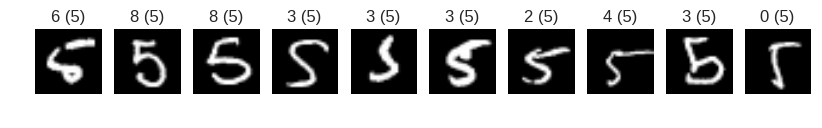

In [15]:
show_failures(pred_df, trueclass=5)

### XGBoost

In [16]:
t0 = time()
clf_xgb = XGBClassifier()
print(clf_xgb.fit(X_train[:10000,:,:].reshape(-1,28*28), y_train[:10000]))
print("Aikaa kului: %.2fs" % (time()-t0))

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
Aikaa kului: 101.79s


In [18]:
pred_xgb = clf_xgb.predict(X_test.reshape(-1,28*28))
print("Ennakoitu", len(pred_xgb), "numeroa tarkkuudella", accuracy_score(y_test, pred_xgb))

Ennakoitu 10000 numeroa tarkkuudella 0.9272
